## Analysis Questions
Pollutant-Specific Trends (Krishna):
- How have Nitrogen dioxide (NO2) levels changed over time across different neighborhoods?
- What are the trends in Ozone (O3) levels in various neighborhoods over the years?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # For treemaps


In [2]:
# Load data
data = pd.read_csv('Air_Quality_20240801.csv')
data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN


In [3]:

# Convert 'Start_Date' to datetime
data['Start_Date'] = pd.to_datetime(data['Start_Date'], errors='coerce')

In [4]:
# Ensure 'Data Value' is numeric, coercing errors to NaN
data['Data Value'] = pd.to_numeric(data['Data Value'], errors='coerce')

In [5]:
# Drop rows with NaN in 'Data Value'
data = data.dropna(subset=['Data Value'])

In [6]:
# Filter data for NO2 and O3
no2_data = data[data['Name'] == 'Nitrogen dioxide (NO2)']
o3_data = data[data['Name'] == 'Ozone (O3)']

In [7]:
no2_data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
26,176692,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2013,2012-12-01,18.6,NaN
27,549806,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2017,2017-01-01,17.7,NaN
28,175369,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,409.0,Southeast Queens,Winter 2010-11,2010-12-01,25.7,NaN
29,175915,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,409.0,Southeast Queens,Summer 2009,2009-06-01,16.1,NaN
30,549872,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,410.0,Rockaways,Annual Average 2017,2017-01-01,12.7,NaN


In [8]:
o3_data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
723,412019,386,Ozone (O3),Mean,ppb,UHF42,308.0,Greenwich Village - SoHo,Summer 2016,2016-06-01,30.0,NaN
724,411990,386,Ozone (O3),Mean,ppb,Borough,2.0,Brooklyn,Summer 2016,2016-06-01,34.0,NaN
725,222481,386,Ozone (O3),Mean,ppb,UHF42,207.0,East Flatbush - Flatbush,Summer 2011,2011-06-01,32.7,NaN
726,412008,386,Ozone (O3),Mean,ppb,UHF42,208.0,Canarsie - Flatlands,Summer 2016,2016-06-01,35.8,NaN
727,222439,386,Ozone (O3),Mean,ppb,UHF42,107.0,Hunts Point - Mott Haven,Summer 2011,2011-06-01,33.4,NaN


# Descriptive Statistics and Outliers for NO2 and O3

In [9]:
# Descriptive statistics for NO2
no2_stats = no2_data['Data Value'].describe()
print("NO2 Statistics:", no2_stats)

NO2 Statistics: count    5922.000000
mean       20.641118
std         6.284214
min         4.900000
25%        16.100000
50%        20.300000
75%        24.975000
max        50.600000
Name: Data Value, dtype: float64


In [10]:
# Identifying outliers for NO2 using IQR
Q1_no2 = no2_data['Data Value'].quantile(0.25)
Q3_no2 = no2_data['Data Value'].quantile(0.75)
IQR_no2 = Q3_no2 - Q1_no2
outliers_no2 = no2_data[(no2_data['Data Value'] < (Q1_no2 - 1.5 * IQR_no2)) | (no2_data['Data Value'] > (Q3_no2 + 1.5 * IQR_no2))]

In [11]:
# Descriptive statistics for O3
o3_stats = o3_data['Data Value'].describe()
print("O3 Statistics:", o3_stats)

O3 Statistics: count    2115.000000
mean       30.290875
std         3.273248
min        14.400000
25%        28.500000
50%        30.500000
75%        32.500000
max        40.400000
Name: Data Value, dtype: float64


In [12]:
# Identifying outliers for O3 using IQR
Q1_o3 = o3_data['Data Value'].quantile(0.25)
Q3_o3 = o3_data['Data Value'].quantile(0.75)
IQR_o3 = Q3_o3 - Q1_o3
outliers_o3 = o3_data[(o3_data['Data Value'] < (Q1_o3 - 1.5 * IQR_o3)) | (o3_data['Data Value'] > (Q3_o3 + 1.5 * IQR_o3))]

# Plot the Trends Over Time

- NO2 Levels Trend

In [13]:
# Aggregate NO2 data by year and neighborhood
no2_data['Year'] = no2_data['Start_Date'].dt.year
no2_yearly = no2_data.groupby(['Year', 'Geo Place Name'])['Data Value'].mean().reset_index()

C:\Users\mistr184\AppData\Local\Temp\ipykernel_19004\471893772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no2_data['Year'] = no2_data['Start_Date'].dt.year


In [15]:
# Aggregate NO2 data by year and neighborhood
o3_data['Year'] = o3_data['Start_Date'].dt.year
o3_yearly = o3_data.groupby(['Year', 'Geo Place Name'])['Data Value'].mean().reset_index()

C:\Users\mistr184\AppData\Local\Temp\ipykernel_19004\3315091714.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- Interactive Visualization with Plotly

In [17]:
import plotly.express as px

# Interactive plot for NO2 levels
fig_no2 = px.line(no2_yearly, x='Year', y='Data Value', color='Geo Place Name', 
                  title='Yearly Trends in NO2 Levels Across Neighborhoods')
fig_no2.show()


# NO2 Trends
The line plot for NO2 levels over time shows how the concentration of Nitrogen dioxide varies across different neighborhoods in NYC.

- *Higher NO2 levels* in certain neighborhoods might indicate more traffic congestion, industrial activities, or other sources of NO2 pollution.
- *Temporal patterns*: Seasonal variations can be observed, such as higher levels in winter due to heating and lower dispersion.
- *Year-over-year trends*: These can help identify whether pollution control measures are effective.

In [18]:
# Interactive plot for O3 levels
fig_o3 = px.line(o3_yearly, x='Year', y='Data Value', color='Geo Place Name', 
                 title='Yearly Trends in O3 Levels Across Neighborhoods')
fig_o3.show()

# O3 Trends
The line plot for O3 levels indicates the trends in Ozone concentration across neighborhoods.

- *Higher O3 levels* are often associated with sunny weather and can be higher in summer due to photochemical reactions.
- *Spatial patterns*: Some neighborhoods might consistently show higher O3 levels due to local sources or atmospheric conditions.
- *Temporal patterns*: Identifying seasonal trends helps in understanding the dynamics of O3 formation and dispersion.

In [ ]:

# Convert 'Start_Date' to datetime
data['Start_Date'] = pd.to_datetime(data['Start_Date'], errors='coerce')

# Ensure 'Data Value' is numeric, coercing errors to NaN
data['Data Value'] = pd.to_numeric(data['Data Value'], errors='coerce')

# Drop rows with NaN in 'Data Value' or 'Start_Date'
data = data.dropna(subset=['Data Value', 'Start_Date'])

# Extract Year and Month from 'Start_Date'
data['Year'] = data['Start_Date'].dt.year
data['Month'] = data['Start_Date'].dt.month

# Check if 'Year' column is created correctly
print(data[['Start_Date', 'Year', 'Month']].head())

# Display the first few rows of the dataset
data.head()


  Start_Date  Year  Month
0 2015-01-01  2015      1
1 2015-01-01  2015      1
2 2011-12-01  2011     12
3 2011-12-01  2011     12
4 2022-06-01  2022      6


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message,Year,Month
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,2015-01-01,0.3,NaN,2015,1
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,2015-01-01,1.2,NaN,2015,1
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,2011-12-01,8.6,NaN,2011,12
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,2011-12-01,8.0,NaN,2011,12
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,2022-06-01,6.1,NaN,2022,6


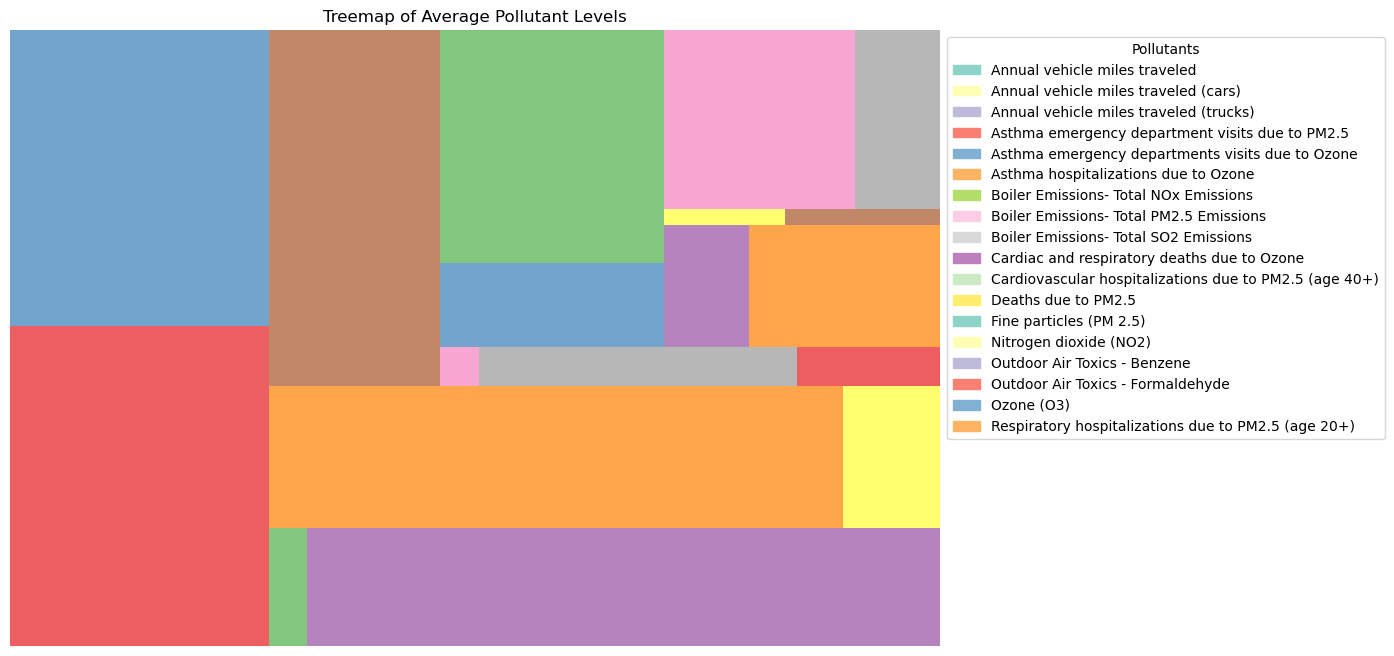

In [ ]:
# Create a treemap of average pollutant levels without labels
avg_pollutant_levels = data.groupby('Name')['Data Value'].mean().reset_index()
avg_pollutant_levels['Size'] = avg_pollutant_levels['Data Value']

plt.figure(figsize=(12, 8))
squarify.plot(sizes=avg_pollutant_levels['Size'], alpha=0.7, color=sns.color_palette("Set1", len(avg_pollutant_levels)))
plt.axis('off')
plt.title('Treemap of Average Pollutant Levels')

# Create custom legend
labels = avg_pollutant_levels['Name']
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in sns.color_palette("Set3", len(labels))]
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), title='Pollutants')
plt.show()

Insights

*Size Proportionality*:

- The size of each rectangle directly correlates with the average concentration of the pollutant. Larger rectangles indicate higher average levels of pollution.
- This visual cue helps in quickly identifying which pollutants have higher concentrations in NYC.

*Pollutant Comparison*:

- By comparing the sizes of the rectangles, we can identify which pollutants are more prevalent in terms of their average levels.
- For example, if the rectangle representing Fine particles (PM 2.5) is significantly larger than that for Ozone (O3), it indicates that PM 2.5 levels are higher on average.

*Pollutant Diversity*:

- The variety of rectangles shows the diversity of pollutants being measured and analyzed.
- This can highlight the multifaceted nature of air pollution, where multiple pollutants need to be monitored and managed.

*Pollutant Highlighting*:

- The legend on the right provides a quick reference to understand which pollutant each color represents.
- This enhances the interpretability of the treemap, making it easier to communicate findings to stakeholders or in reports.

*Practical Implications*
- Public Health: Understanding which pollutants are more prevalent can help in prioritizing public health interventions. For example, if NO2 levels are high, steps can be taken to reduce vehicle emissions.
- Policy Making: The treemap can be used by policymakers to identify which pollutants need stricter regulations or more robust monitoring.
- Awareness: Visualizations like treemaps can be used in public awareness campaigns to educate residents about air quality and its health impacts.

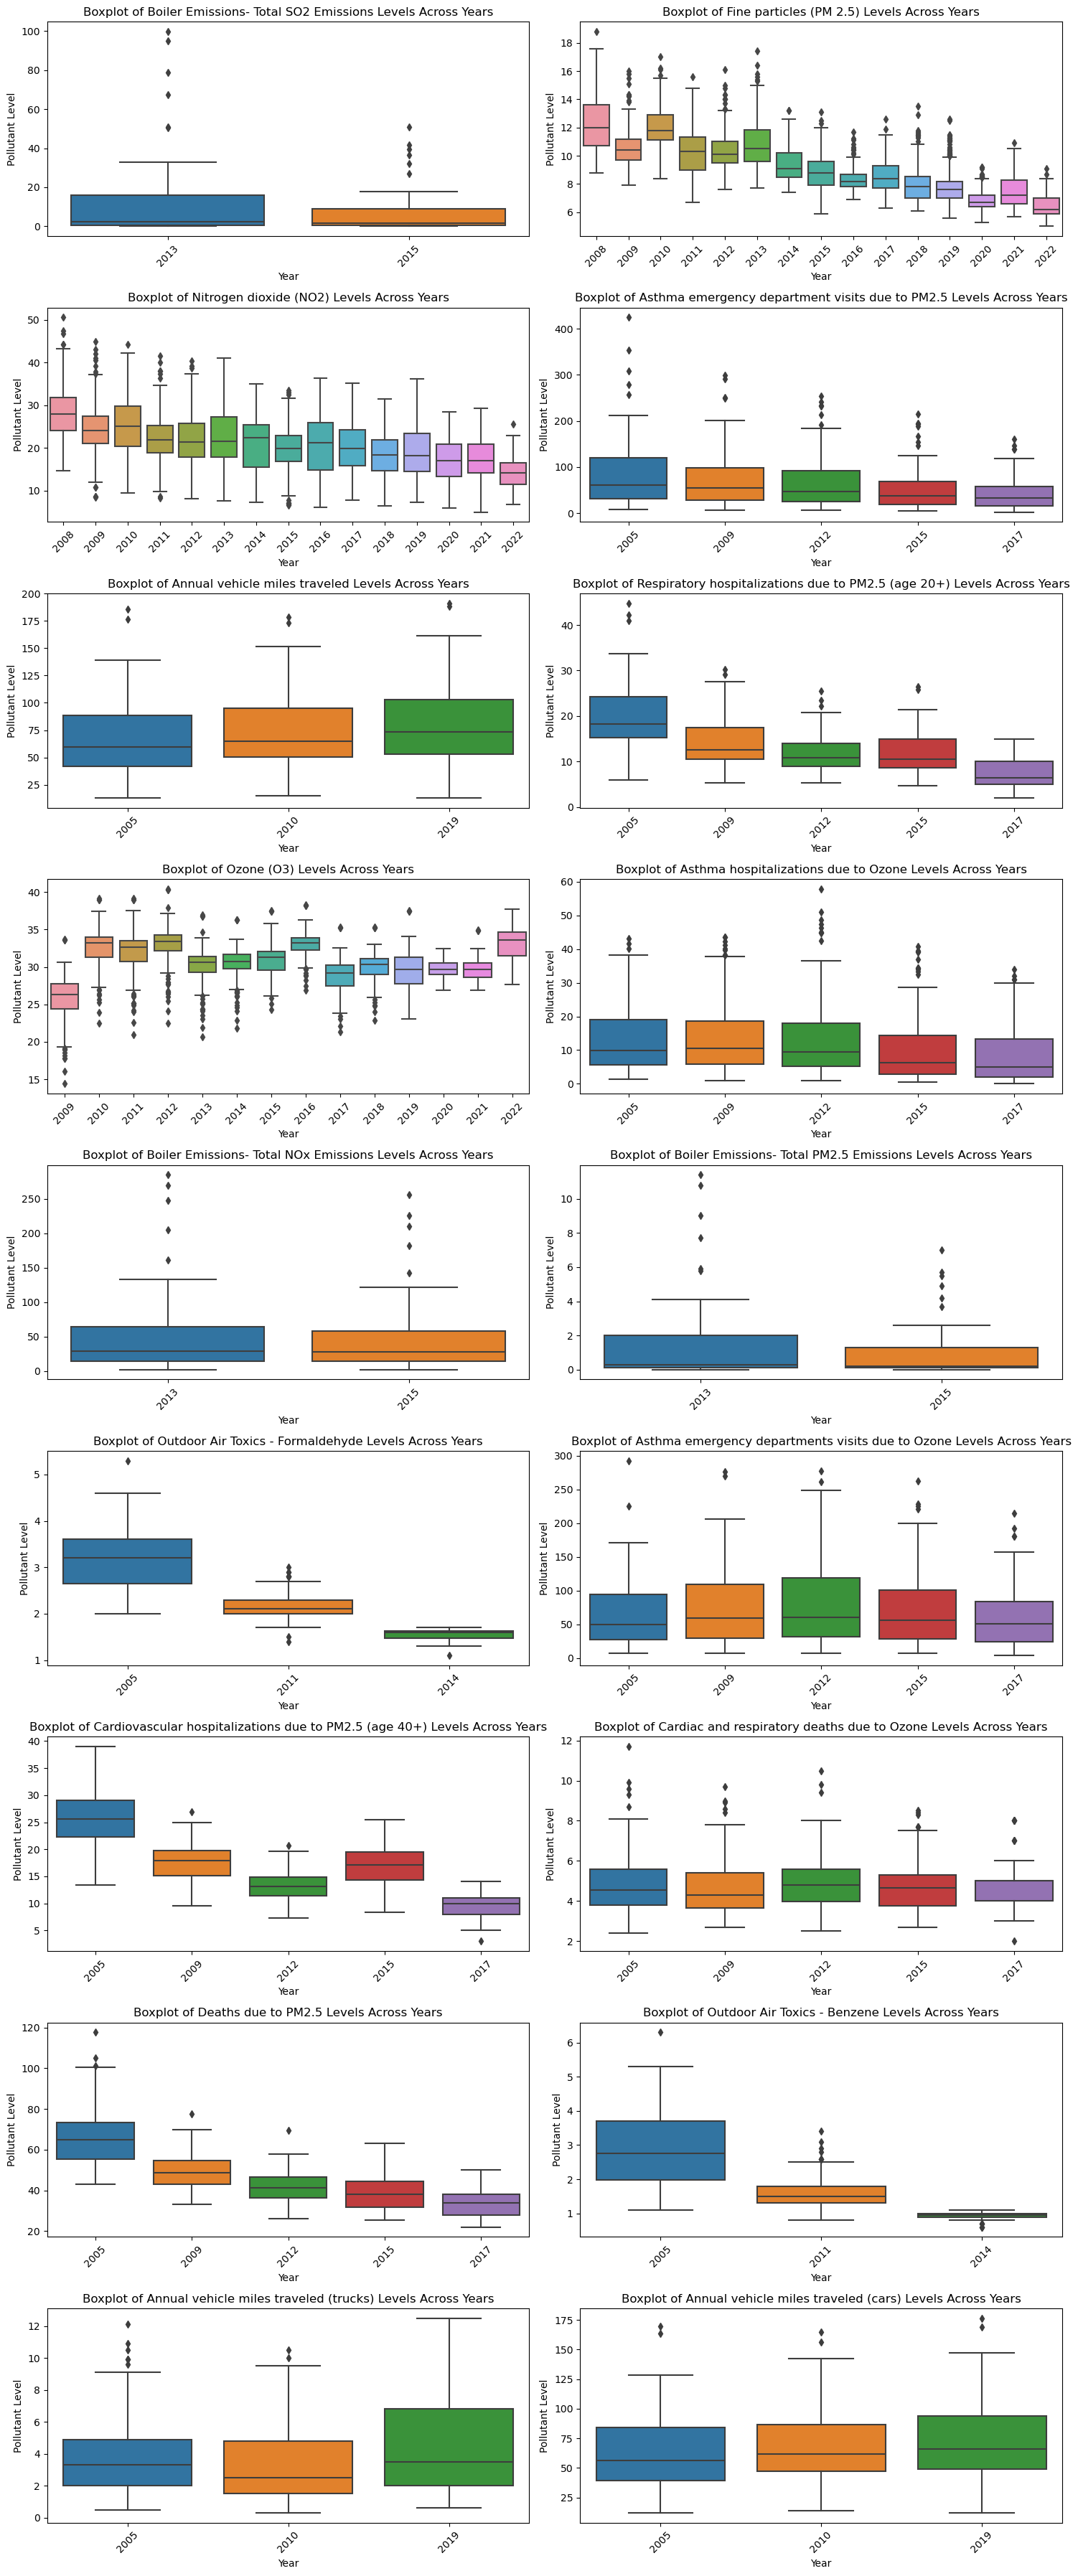

In [ ]:
# List of pollutants
pollutants = data['Name'].unique()

# Calculate the grid size
n_rows = (len(pollutants) + 1) // 2  # Ensure enough rows for all pollutants
n_cols = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))

for i, pollutant in enumerate(pollutants):
    ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(x='Year', y='Data Value', data=data[data['Name'] == pollutant], ax=ax)
    ax.set_title(f'Boxplot of {pollutant} Levels Across Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Pollutant Level')
    ax.tick_params(axis='x', rotation=45)

# Hide any empty subplots
if len(pollutants) % 2 != 0:  # If odd number of pollutants, hide the last empty subplot
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

Key Findings
Fine Particles (PM 2.5):

PM 2.5 levels exhibit noticeable variability across different years.
Some regions consistently report higher PM 2.5 levels, suggesting persistent local pollution sources.
Fluctuations in PM 2.5 levels may correlate with seasonal or environmental changes.
Boiler Emissions (SO2):

SO2 emissions show a wide range of values, varying significantly between different regions and years.
While the overall levels of SO2 appear stable, certain areas experience higher concentrations, likely due to localized industrial activities.
Regional Differences:

Specific geographic areas consistently show higher pollutant levels, indicating regional disparities in air quality.
These differences may be influenced by factors such as industrial activity, traffic density, and regulatory enforcement.
Temporal Trends:

The distribution of pollutant levels over the years reflects possible impacts of regulatory measures aimed at improving air quality.
Seasonal patterns may be influencing pollutant concentrations, with some pollutants peaking during specific times of the year.

In [ ]:

data['Latitude'] = 40.7128  
data['Longitude'] = -74.0060  

# Create a 3D scatter plot
fig = px.scatter_3d(data, x='Longitude', y='Latitude', z='Data Value',
                    color='Name',  # Color by pollutant
                    size='Data Value',  # Size by Data Value
                    hover_name='Geo Place Name',  # Hover information
                    animation_frame='Year',  # Animation over the years
                    title='3D Map of Air Quality Data in NYC')

# Update layout for better visualization
fig.update_layout(scene=dict(
    xaxis_title='Longitude',
    yaxis_title='Latitude',
    zaxis_title='Pollutant Level'
))

fig.show()

Pollutant Distribution:

The 3D scatter plot reveals distinct spatial distributions of pollutants across New York City.
Certain pollutants, like PM 2.5 and SO2, cluster around specific geographic coordinates, indicating potential hotspots of pollution.
Pollutant Levels:

Pollutant levels vary significantly, with some regions showing consistently higher concentrations. The size of the points in the 3D plot correlates with pollutant levels, making it easy to identify areas with severe air quality issues.
Temporal Changes:

The animation over the years demonstrates how pollutant levels have changed over time in different areas. This temporal dimension highlights periods of improvement or deterioration in air quality.
Regional Hotspots:

The plot identifies key areas in NYC where pollutant levels are consistently higher, suggesting the influence of local factors such as industrial activity, traffic, or other sources of emissions.

c:\Users\mistr184\AppData\Local\anaconda3\envs\inclassactivity\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mistr184\AppData\Local\anaconda3\envs\inclassactivity\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



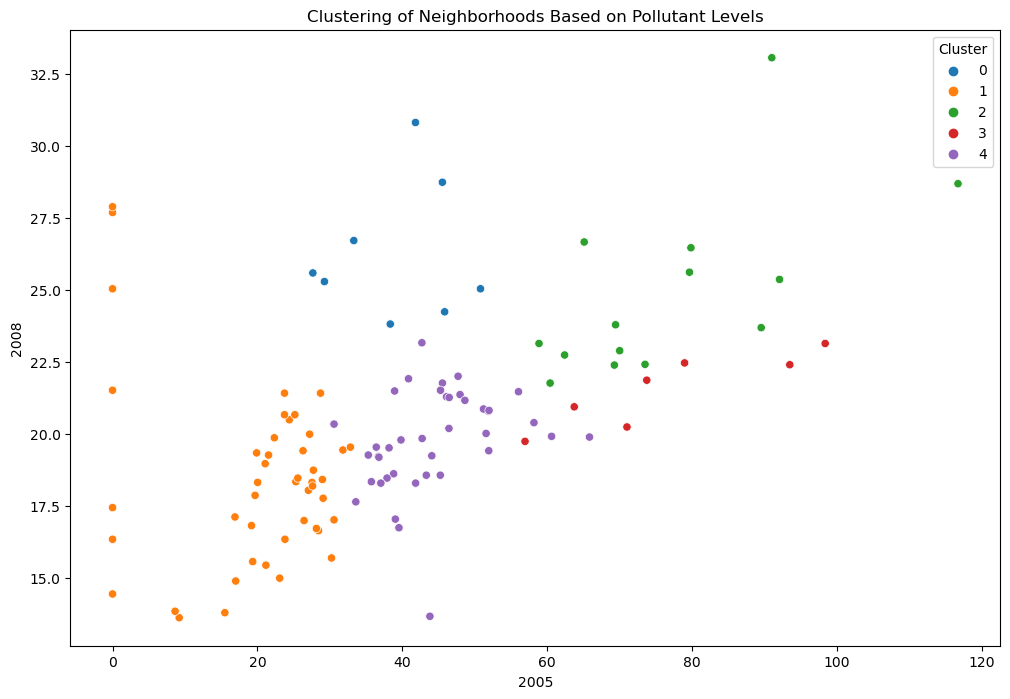

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare data for clustering
clustering_data = data.pivot_table(index='Geo Place Name', columns='Year', values='Data Value', aggfunc='mean').fillna(0)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(clustering_data)
clustering_data['Cluster'] = kmeans.labels_

# Plot clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=clustering_data, x=clustering_data.columns[0], y=clustering_data.columns[1], hue='Cluster', palette='tab10')
plt.title('Clustering of Neighborhoods Based on Pollutant Levels')
plt.show()


Distinct Air Quality Patterns:

The clustering analysis reveals that NYC neighborhoods can be categorized into distinct groups based on their air quality profiles. These groups (clusters) share similar pollutant levels, indicating common sources of pollution or environmental factors.

High-Pollution Clusters:

Certain clusters are associated with consistently higher pollutant levels, pointing to areas that may be more exposed to pollution sources like industrial activity, traffic, or other localized factors. These neighborhoods may require targeted interventions to reduce pollution.

Low-Pollution Clusters:

Other clusters show neighborhoods with lower pollutant levels, suggesting that these areas either have fewer pollution sources or benefit from effective pollution control measures. These regions might serve as benchmarks for successful air quality management.

Geographic and Temporal Trends:

The clustering reflects not only the current state of air quality but also long-term trends, as it averages data over multiple years. This consistency highlights persistent patterns of pollution that could inform future urban planning and public health initiatives.

Opportunities for Targeted Policies:

The differentiation between clusters provides a clear framework for developing targeted environmental policies. Neighborhoods within the same cluster may benefit from similar pollution reduction strategies, while those in different clusters might require more tailored approaches.